# DataArray

The [DataArray](../api/DataArray.html#mikeio.DataArray) is the common
MIKE IO data structure for *item* data from dfs files. The
[`mikeio.read`](../api/read.html#mikeio.read) methods returns a Dataset
as a container of DataArrays (Dfs items)

Each DataArray have the following properties:

-   **item** - an
    [`mikeio.ItemInfo`](../api/ItemInfo.html#mikeio.ItemInfo) with name,
    type and unit
-   **time** - a
    [`pandas.DatetimeIndex`](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex)
    with the time instances of the data
-   **geometry** - a Geometry object with the spatial description of the
    data
-   **values** - a
    [`numpy.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray)

Use DataArray’s string representation to get an overview of the
DataArray

In [1]:
import mikeio

ds = mikeio.read("../data/HD2D.dfsu")
da = ds["Surface elevation"]
da

<mikeio.DataArray>
name: Surface elevation
dims: (time:9, element:884)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (884 elements, 529 nodes)

##  Temporal selection

A time slice of a DataArray can be selected in several different ways.

In [2]:
da.sel(time="1985-08-06 12:00")

<mikeio.DataArray>
name: Surface elevation
dims: (element:884)
time: 1985-08-06 12:00:00 (time-invariant)
geometry: Dfsu2D (884 elements, 529 nodes)
values: [0.1012, 0.1012, ..., 0.105]

In [3]:
da.sel(time=slice("1985-08-06 12:00", "1985-08-06 17:00"))

<mikeio.DataArray>
name: Surface elevation
dims: (time:3, element:884)
time: 1985-08-06 12:00:00 - 1985-08-06 17:00:00 (3 records)
geometry: Dfsu2D (884 elements, 529 nodes)

In [4]:
da.isel(time=2)

<mikeio.DataArray>
name: Surface elevation
dims: (element:884)
time: 1985-08-06 12:00:00 (time-invariant)
geometry: Dfsu2D (884 elements, 529 nodes)
values: [0.1012, 0.1012, ..., 0.105]

In [5]:
da.isel(time=range(2, ds.n_timesteps, 2))

<mikeio.DataArray>
name: Surface elevation
dims: (time:4, element:884)
time: 1985-08-06 12:00:00 - 1985-08-07 03:00:00 (4 records)
geometry: Dfsu2D (884 elements, 529 nodes)

##  Spatial selection

The [`sel`](../api/DataArray.html#mikeio.DataArray.sel) method finds the
nearest element.

In [6]:
da.sel(x=607002, y=6906734)

<mikeio.DataArray>
name: Surface elevation
dims: (time:9)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: GeometryPoint2D(x=607002.7094112666, y=6906734.833048992)
values: [0.4591, 0.8078, ..., -0.6311]

## Modifying values

You can modify the values of a DataArray by changing its
[`values`](../api/DataArray.html#mikeio.DataArray.values):

In [7]:
da.values[0, 3] = 5.0

If you wish to change values of a subset of the DataArray you should be
aware of the difference between a *view* and a *copy* of the data.
Similar to NumPy, MIKE IO selection method will return a *view* of the
data when using single index and slices, but a *copy* of the data using
fancy indexing (a list of indicies or boolean indexing). Note that prior
to release 1.3, MIKE IO would always return a copy.

It is recommended to change the values using `values` property directly
on the original DataArray (like above), but it is also possible to
change the values of the original DataArray by working on a subset
DataArray if it is selected with single index or slice as explained
above.

In [8]:
da_sub = da.isel(time=0)
da_sub.values[:] = 5.0    # will change da

Fancy indexing will return a *copy* and therefore not change the
original:

In [9]:
da_sub = da.isel(time=[0,1,2])
da_sub.values[:] = 5.0    # will NOT change da

##  Plotting

The plotting of a DataArray is context-aware meaning that plotting
behaviour depends on the geometry of the DataArray being plotted.

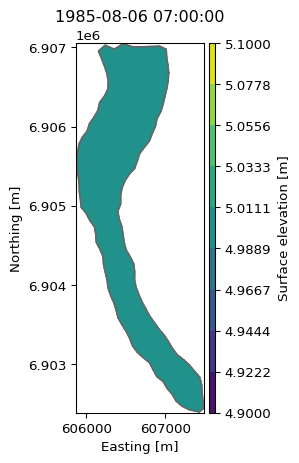

In [10]:
da.plot()

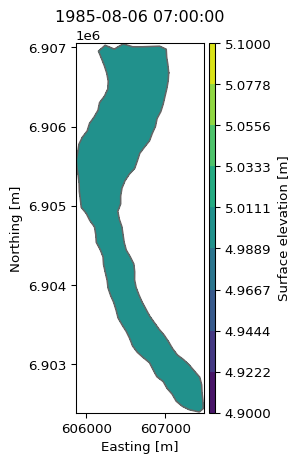

In [11]:
da.plot.contourf()

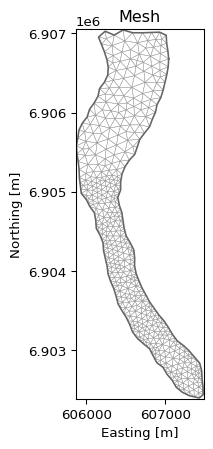

In [12]:
da.plot.mesh()

See details in the [API
specification](../api/dataset._DataArrayPlotter.html#mikeio.dataset._DataArrayPlotter)
below and in the bottom of the relevant pages e.g. [DataArray Plotter
Grid2D
API](../api/dataset._DataArrayPlotterGrid2D.html#mikeio.dataset._DataArrayPlotterGrid2D).

## Properties

The DataArray has several properties:

-   time - Time index
-   geometry - geometry of the data (e.g. `spatial.GeometryFM2D`)
-   shape - Shape of the data
-   deletevalue - File delete value (NaN value)

In [13]:
da.geometry

Flexible Mesh Geometry: Dfsu2D
number of nodes: 529
number of elements: 884
projection: UTM-29

## Methods

DataArray has several useful methods for working with data, including
different ways of *selecting* data:

-   [`sel()`](../api/DataArray.html#mikeio.DataArray.sel) - Select
    subset along an axis
-   [`isel()`](../api/DataArray.html#mikeio.DataArray.isel) - Select
    subset along an axis with an integer

### Aggregations along an axis

-   [`mean()`](../api/DataArray.html#mikeio.DataArray.mean) - Mean value
    along an axis
-   [`nanmean()`](../api/DataArray.html#mikeio.DataArray.nanmean) - Mean
    value along an axis (NaN removed)
-   [`max()`](../api/DataArray.html#mikeio.DataArray.max) - Max value
    along an axis
-   [`nanmax()`](../api/DataArray.html#mikeio.DataArray.nanmax) - Max
    value along an axis (NaN removed)
-   [`min()`](../api/DataArray.html#mikeio.DataArray.min) - Min value
    along an axis
-   [`nanmin()`](../api/DataArray.html#mikeio.DataArray.nanmin) - Min
    value along an axis (NaN removed)
-   [`aggregate()`](../api/DataArray.html#mikeio.DataArray.aggregate) -
    Aggregate along an axis
-   [`quantile()`](../api/DataArray.html#mikeio.DataArray.quantile) -
    Quantiles along an axis

##  Mathematical operations

-   ds + value
-   ds - value
-   ds \* value

and + and - between two DataArrays (if number of items and shapes
conform):

-   ds1 + ds2
-   ds1 - ds2

## Multiply or add scalar

In [14]:
da1 = mikeio.read("../data/oresundHD_run1.dfsu", items="Surface elevation")[0]
da2 = mikeio.read("../data/oresundHD_run2.dfsu", items="Surface elevation")[0]

da1.values.mean()

np.float32(0.18681717)

In [15]:
da1_A = da1 + 1
da1_B = da1 - 1
da1_A.values.mean(), da1_B.values.mean()

(np.float32(1.1868172), np.float32(-0.81318283))

In [16]:
da1_C = da1 * 2
da1_D = da1 / 2
da1_C.values.mean(), da1_D.values.mean()

(np.float32(0.37363434), np.float32(0.093408585))

## Difference between two DataArrays

Assume that we have two calibration runs and we wan’t to find the
difference…

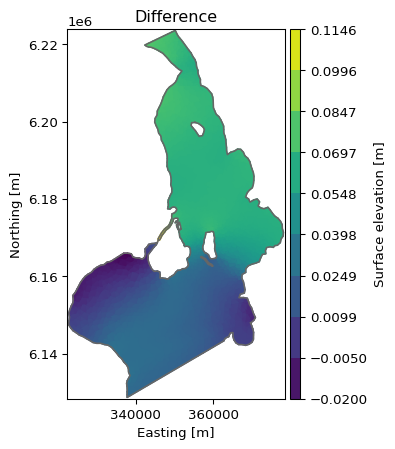

In [17]:
da_diff = da1-da2
da_diff.plot(title="Difference");

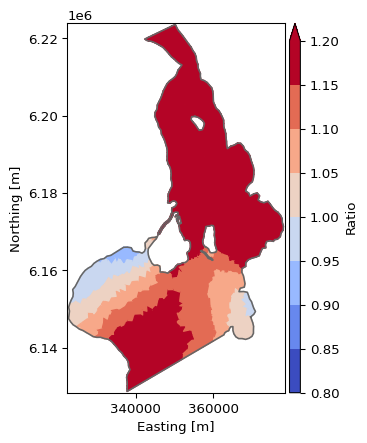

In [18]:
da_ratio = da1 / da2
da_ratio.plot(title="", label="Ratio", vmin=0.8, vmax=1.2, levels=9, cmap="coolwarm")

## Unit handling

Multiplication and divison of two physical quantities would normally
change the unit of the result, but in the case of DataArrays, the type
and unit of the result will be the ones of the first operand.

Other methods that also return a DataArray:

-   [`interp_like`](../api/DataArray.html#mikeio.DataArray.interp_like) -
    Spatio (temporal) interpolation (see example [Dfsu
    interpolation](../examples/dfsu/spatial_interpolation.qmd)
-   [`interp_time()`](../api/DataArray.html#mikeio.DataArray.interp_time) -
    Temporal interpolation (see example [Time
    interpolation](../examples/Time-interpolation.qmd))
-   [`dropna()`](../api/DataArray.html#mikeio.DataArray.dropna) - Remove
    time steps where all items are NaN
-   [`fillna()`](../api/DataArray.html#mikeio.DataArray.fillna) - Fill
    missing values with a constant value
-   [`squeeze()`](../api/DataArray.html#mikeio.DataArray.squeeze) -
    Remove axes of length 1

### Conversion:

-   [`to_xarray()`](../api/DataArray.html#mikeio.DataArray.to_xarray) -
    Convert DataArray to a xarray DataArray (great for Dfs2)
-   [`to_dfs()`](../api/DataArray.html#mikeio.DataArray.to_dfs) - Write
    DataArray to a Dfs file